In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/13632/Downloads/dataset_stance.csv')

In [3]:
df['Tweet'] = df['Tweet'].str.lower().str.replace('[^a-zA-Z0-9]',' ', regex=True).str.strip()
#change to lowercase and remove alphanumeric and punctuation

      Unnamed: 0                                              Tweet  \
0              0  tedcruz and   handovertheserver she wiped clea...   
1              1  hillary is our best choice if we truly want to...   
2              2  theview i think our country is ready for a fem...   
3              3  i just gave an unhealthy amount of my hard ear...   
4              4  portiaaboulger thank you for adding me to your...   
...          ...                                                ...   
4865        1951  realdonaldtrump we all want you as the next pr...   
4866        1952  rsherman 25 join twitter trump brigade  onetho...   
4867        1953  joeybats19 join twitter trump brigade  onethou...   
4868        1954  trump s outlandish statements is political str...   
4869        1955  rmconservative  dagnyred  p c  is out of contr...   

               Target   Stance  \
0     Hillary Clinton  AGAINST   
1     Hillary Clinton    FAVOR   
2     Hillary Clinton  AGAINST   
3     Hilla

In [4]:
grouped_df = df.groupby(['Target'])

In [5]:
grouped_df['Target'].unique()

Target
Atheism                                                      [Atheism]
Climate Change is a Real Concern    [Climate Change is a Real Concern]
Donald Trump                                            [Donald Trump]
Feminist Movement                                  [Feminist Movement]
Hillary Clinton                                      [Hillary Clinton]
Legalization of Abortion                    [Legalization of Abortion]
Name: Target, dtype: object

In [6]:
df_atheism = grouped_df.get_group('Atheism')
df_climate = grouped_df.get_group('Climate Change is a Real Concern')
df_trump = grouped_df.get_group('Donald Trump')
df_feminist = grouped_df.get_group('Feminist Movement')
df_clinton = grouped_df.get_group('Hillary Clinton')
df_abortion = grouped_df.get_group('Legalization of Abortion')

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

In [47]:
df_atheism['Tweet'][100]

'dear lord thank u for all of ur blessings forgive my sins lord give me strength and energy for this busy day ahead  blessed  hope  semst'

In [60]:
pip install nltk --upgrade

Defaulting to user installation because normal site-packages is not writeable
Could not fetch URL https://pypi.org/simple/nltk/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/nltk/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)'))) - skipping
Note: you may need to restart the kernel to use updated packages.


In [61]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\13632\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [69]:
def token(df): #function removes all stopwords and converts all words into a list
    df = df.reset_index()
    for_words = []
    against_words = []
    neutral_words = []
    for i in range(len(df)):
        word_tokens = word_tokenize(df['Tweet'][i])
        if df['Stance'][i] == 'FAVOR': 
            for w in word_tokens:
                if w not in stop_words:
                    for_words.append(w)
        elif df['Stance'][i] == 'AGAINST':
            for w in word_tokens:
                if w not in stop_words:
                    against_words.append(w)
        else:
            for w in word_tokens:
                if w not in stop_words:
                    neutral_words.append(w)
    return for_words, against_words, neutral_words

In [146]:
def word_counter(df):#produces a dictionary where key is the unique word and value is the frequency of each unique word
    unique_tally = {}
    for i in range(len(df)):
        if df[i] not in unique_tally:
            unique_tally[df[i]] = 1
        else:
            unique_tally[df[i]] += 1
    return unique_tally

In [147]:
for_atheism, against_atheism, neutral_atheism = token(df_atheism)
for_climate, against_climate, neutral_climate = token(df_climate)
for_trump, against_trump, neutral_trump = token(df_trump)
for_feminist, against_feminist, neutral_feminist = token(df_feminist)
for_clinton, against_clinton, neutral_clinton = token(df_clinton)
for_abortion, against_abortion, neutral_abortion = token(df_abortion)

In [148]:
for_atheism_tally = word_counter(for_atheism)
against_atheism_tally = word_counter(against_atheism)
neutral_atheism_tally = word_counter(neutral_atheism)
for_climate_tally = word_counter(for_climate)
against_climate_tally = word_counter(against_climate)
neutral_climate_tally = word_counter(neutral_climate)
for_trump_tally = word_counter(for_trump)
against_trump_tally = word_counter(against_trump)
neutral_trump_tally = word_counter(neutral_trump)
for_feminist_tally = word_counter(for_feminist)
against_feminist_tally = word_counter(against_feminist)
neutral_feminist_tally = word_counter(neutral_feminist)
for_clinton_tally = word_counter(for_clinton)
against_clinton_tally = word_counter(against_clinton)
neutral_clinton_tally = word_counter(neutral_clinton)
for_abortion_tally = word_counter(for_abortion)
against_abortion_tally = word_counter(against_abortion)
neutral_abortion_tally = word_counter(neutral_abortion)

In [149]:
from heapq import nlargest

In [151]:
def n_top_pairs(df, n): #customise the number of words with greatest frequency
    top_pairs = dict(sorted(df.items(), key = lambda x: x[1], reverse = True)[:n])
    return top_pairs

In [152]:
top_ten_atheism = n_top_pairs(for_atheism_tally, 10)

In [154]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

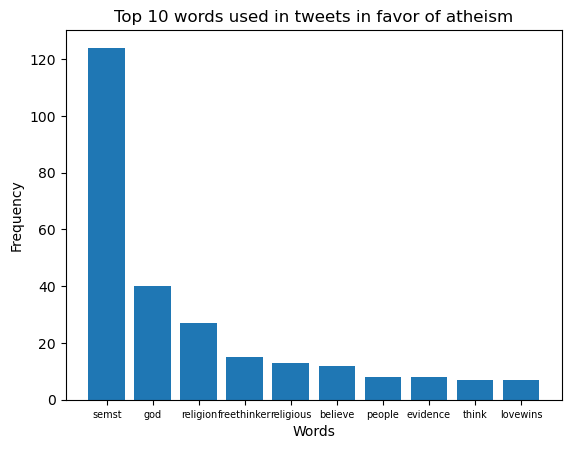

In [165]:
plt.bar(top_ten_atheism.keys(), top_ten_atheism.values())
plt.tick_params(axis='x', which='major', labelsize=7)
plt.title("Top 10 words used in tweets in favor of atheism")
plt.xlabel("Words")
plt.ylabel('Frequency')

In [1]:
#START TF-IDF
#convert column of tweets to list
def listing(df):
    for_tweets = []
    against_tweets = []
    neutral_tweets = []
    for i in range(len(df)):
        if df['Stance'][i] == 'FAVOR':
            for_tweets.append(df['Tweet'][i])
        elif df['Stance'][i] == 'AGAINST':
            against_tweets.append(df['Tweet'][i])
        else:
            neutral_tweets.append(df['Tweet'][i])
    return for_tweets, against_tweets, neutral_tweets